In [3]:
import numpy
import pandas
import numpy as np
import keras
from keras import models
import tensorflow as tf
from keras import layers
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


### fix random seed for reproducibility

In [4]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


## load dataset

In [5]:
dataframe = pandas.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

In [6]:
dataframe

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Labelling the data

In [8]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)


In [11]:
dummy_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

## Creating Baseline

In [12]:
# define baseline model
def create_baseline():
    model=models.Sequential()
    model.add(layers.Dense(8,activation='relu',input_shape=(4,)))
    model.add(layers.Dense(3,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
    return model
estimator=KerasClassifier(build_fn=create_baseline,epochs=200,batch_size=5,verbose=0)

## Step 4. Evaluate The Model with k-Fold Cross Validation

In [31]:
kfold=KFold(n_splits=10,random_state=seed,shuffle=True)
results=cross_val_score(estimator,X,dummy_y,cv=kfold)

In [32]:
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 97.33% (3.27%)


### Ten different results using kfold strategy

In [33]:
results

array([1.        , 0.93333334, 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.93333334, 0.93333334, 0.93333334])

## Step 5. Tuning Layers and Number of Neurons in The Model

### Step 5.1. Evaluate a Smaller Network

In [34]:
def create_baseline():
    model=models.Sequential()
    model.add(layers.Dense(2,activation='softmax',input_shape=(4,)))
    model.add(layers.Dense(3,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
    return model

estimator=KerasClassifier(build_fn=create_baseline,epochs=200,batch_size=5,verbose=0)
kfold=KFold(n_splits=10,random_state=seed,shuffle=True)

results=cross_val_score(estimator,X,dummy_y,cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 90.00% (10.85%)


### Ten different results using kfold strategy

In [49]:
results

array([1.        , 0.93333334, 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.93333334, 0.93333334, 0.86666667])

### Evaluating Larger Model

In [36]:
def create_baseline():
    model=models.Sequential()
    model.add(layers.Dense(16,activation='relu',input_shape=(4,)))
    model.add(layers.Dense(8,activation='relu'))
    model.add(layers.Dense(3,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
    return model
estimator=KerasClassifier(build_fn=create_baseline,epochs=200,batch_size=5,verbose=0)
kfold=KFold(n_splits=10,random_state=seed,shuffle=True)
results=cross_val_score(estimator,X,dummy_y,cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 96.67% (4.47%)


### Ten different results using kfold strategy

In [38]:
results

array([1.        , 0.93333334, 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.93333334, 0.93333334, 0.86666667])

## Step 6. Really Scaling up: developing a model that overfits

### using no of epochs =200

In [20]:
val_loss=[]
train_loss=[]
acc=[]
val_acc=[]
np.random.seed(seed)
num_of_epochs=200
def model_define():
    model=models.Sequential()
    model.add(layers.Dense(8,activation='relu',input_shape=(4,)))
    model.add(layers.Dense(3,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
    return model
skf=StratifiedKFold(n_splits=10,shuffle=True, random_state=seed)
skf.get_n_splits(X,encoded_Y)
for train_index , test_index in skf.split(X, encoded_Y):
    model=model_define()
    history=model.fit(X[train_index],dummy_y[train_index],epochs=num_of_epochs,batch_size=5,verbose=0,
                     validation_data=(X[test_index],dummy_y[test_index]))
    val_loss.append(history.history['val_loss'])
    train_loss.append(history.history['loss'])
    acc.append(history.history['acc'])
    val_acc.append(history.history['val_acc'])

In [21]:
print('Accuracy is found to be {}'.format(np.mean(np.mean(val_acc,axis=0))))

Accuracy is found to be 0.9221666685342789


In [22]:
train_acc=np.mean(acc,axis=0)
val_acc=np.mean(val_acc,axis=0)
val_loss=np.mean(val_loss,axis=0)
train_loss=np.mean(train_loss,axis=0)

### Here can we see that 200 epochs are making the model overfit

### Validation Loss:

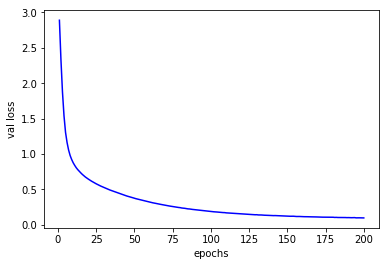

In [23]:
from matplotlib import pyplot as plt

plt.plot(np.arange(1,num_of_epochs+1),val_loss,'b',label='val_loss')
plt.xlabel("epochs")
plt.ylabel("val loss")
plt.show()

### Validation Accuracy:

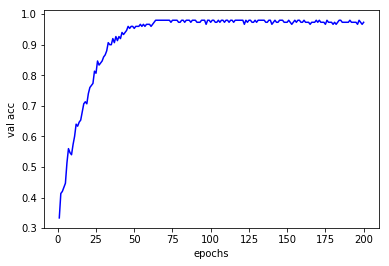

In [24]:
from matplotlib import pyplot as plt

plt.plot(np.arange(1,num_of_epochs+1),val_acc,'b',label='val_acc')

plt.xlabel("epochs")
plt.ylabel("val acc")
plt.show()

### Train Accuracy:

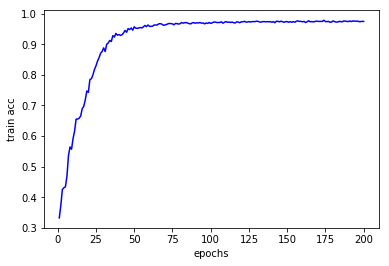

In [25]:
from matplotlib import pyplot as plt

plt.plot(np.arange(1,num_of_epochs+1),train_acc,'b',label='train_acc')

plt.xlabel("epochs")
plt.ylabel("train acc")
plt.show()

### Train Loss:

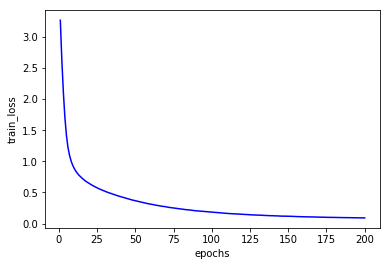

In [26]:
from matplotlib import pyplot as plt

plt.plot(np.arange(1,num_of_epochs+1),train_loss,'b',label='val_acc')

plt.xlabel("epochs")
plt.ylabel("train_loss")
plt.show()

## Step 7. Tuning the Model

### Here 90 epochs are enough to make model between overfitting and underfitting

In [95]:
val_loss=[]
train_loss=[]
acc=[]
val_acc=[]
np.random.seed(seed)
num_of_epochs=90
def model_define():
    model=models.Sequential()
    model.add(layers.Dense(8,activation='relu',input_shape=(4,)))
    model.add(layers.Dense(3,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
    return model
skf=StratifiedKFold(n_splits=10,shuffle=True, random_state=seed)
skf.get_n_splits(X,encoded_Y)
for train_index , test_index in skf.split(X, encoded_Y):
    model=model_define()
    history=model.fit(X[train_index],dummy_y[train_index],epochs=num_of_epochs,batch_size=5,verbose=0,
                     validation_data=(X[test_index],dummy_y[test_index]))
    val_loss.append(history.history['val_loss'])
    train_loss.append(history.history['loss'])
    acc.append(history.history['acc'])
    val_acc.append(history.history['val_acc'])

In [96]:
val_loss=np.mean(val_loss,axis=0)
val_acc=np.mean(val_acc,axis=0)

### Validation Loss:

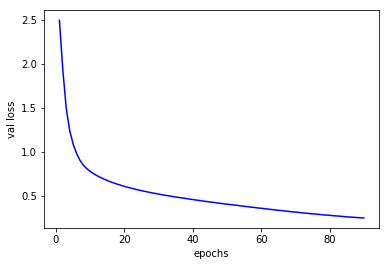

In [97]:
from matplotlib import pyplot as plt

plt.plot(np.arange(1,num_of_epochs+1),val_loss,'b',label='val_loss')
plt.xlabel("epochs")
plt.ylabel("val loss")
plt.show()

### Validation Accuracy:

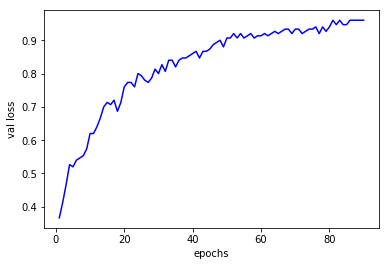

In [98]:
from matplotlib import pyplot as plt

plt.plot(np.arange(1,num_of_epochs+1),val_acc,'b',label='val_loss')
plt.xlabel("epochs")
plt.ylabel("val loss")
plt.show()

In [99]:
np.mean(val_acc)

0.8257777802977299

## Step 8. Rewriting the code using the Keras Functional API

In [118]:
def create_baseline_2():
    inputs=keras.Input(shape=(4,))
    x=layers.Dense(8,activation='relu')(inputs)
    outputs=layers.Dense(3,activation='softmax')(x)

    model=keras.Model(inputs,outputs)
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

np.random.seed(seed)

estimator=KerasClassifier(build_fn=create_baseline_2,epochs=90,batch_size=5,verbose=0)
kfold=KFold(n_splits=10,random_state=seed,shuffle=True)
results=cross_val_score(estimator,X,dummy_y,cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 94.67% (5.81%)


## Step 9. Rewriting the code by doing Model Subclassing

In [129]:
def create_baseline_3():
    class MyModel(tf. keras.Model):
        def __init__(self):
            super(MyModel,self).__init__()
            self.dense1 = Dense(4, activation="relu")
            self.dense2 = Dense(8, activation='relu')
            self.dense3 = Dense(3, activation='softmax')


        def call(self,inputs):
            x = self.dense1(inputs)
            x = self.dense2(x)
            return self.dense3(x)

    model=MyModel()
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

np.random.seed(seed)

estimator=KerasClassifier(build_fn=create_baseline_3,epochs=90,batch_size=5,verbose=0)
kfold=KFold(n_splits=10,random_state=seed,shuffle=True)
results=cross_val_score(estimator,X,dummy_y,cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 28.00% (9.80%)


## Step 10: Without Skit-learn Library

In [123]:
k=10
num_val_samples = len(X) // k
num_epochs = 200
val_loss=[]
val_acc=[]
np.random.seed(seed)
for i in range(k):
    print('processing fold #', i)
    val_data = X[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = dummy_y[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([X[:i * num_val_samples],
                                         X[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([dummy_y[:i * num_val_samples],
                                            dummy_y[(i + 1) * num_val_samples:]],axis=0)
    
    model=create_baseline()
    history=model.fit(partial_train_data,partial_train_targets,shuffle=True,epochs=num_epochs,validation_data=(val_data,val_targets)
                      ,batch_size=5,verbose=0)
    
    val_loss.append(history.history['val_loss'])
    val_acc.append(history.history['val_acc'])

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


### Validation accuracy is found to be:

In [127]:
np.mean(np.mean(val_acc,axis=0))

0.8974333362455169

### Validation loss is found to be:

In [128]:
np.mean(np.mean(val_loss,axis=0))

0.23533180645759239